## Get data from https://fundamentus.com.br/detalhes.php?papel=<papel> and then store values on a python datashhet

# Read Position

In [1]:
#conda activate base
import pandas as pd

# Lê o arquivo Excel
path = "/home/ponche/projects/ibox/b3/"
#fileName = "posicao-2025-12-06-15-13-40.xlsx"
fileName = "posicao-2025-12-22-20-59-02.xlsx"
file = path + fileName
print (file)
df_posicao = pd.read_excel(file, sheet_name='Acoes', header=0, skiprows=0, nrows=300)
#df_posicao = pd.read_excel(file, sheet_name='Posição - Ações', header=0, skiprows=0, nrows=300)

#print(df_posicao.columns)
#print(df_posicao['Código de Negociação'])
df_posicao = df_posicao.dropna(subset=['Código de Negociação'])

df_posicao['Percentual'] = df_posicao['Valor Atualizado'] / df_posicao['Valor Atualizado'].sum()


/home/ponche/projects/ibox/b3/posicao-2025-12-22-20-59-02.xlsx


/home/ponche/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Create a function to get tiker data

In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import math

def converter_float(texto):
    texto = texto.replace(",", ".")
    if texto.endswith("%"):
        texto = texto[:-1]  # remove o símbolo de porcentagem
        return float(texto) / 100
    else:
        try:
            return float(texto)
        except ValueError:
            return 0

def get_ticker_data(ticker, df):
    # Create a new Chrome browser instance
    driver = webdriver.Chrome()
    

    tk = ticker['Código de Negociação']
    percentual = ticker['Percentual']
    # Go to the Python.org website
    driver.get(f"https://fundamentus.com.br/detalhes.php?papel={tk}")

    # Wait for the page to load (not recommended for robust scripts)
    time.sleep(.6)

    # Find the search bar element by its name attribute
    SETOR = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[4]/td[2]/span/a").text
    #SUBSETOR = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[4]/td[2]/span/a").text

    #TIKER = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[1]/td[2]/span").text
    COTACAO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[1]/td[4]/span").text)

    PL = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[2]/td[4]/span").text)
    LPA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[2]/td[6]/span").text)

    P_V = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[3]/td[4]/span").text)
    VPA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[3]/td[6]/span").text)

    P_EBIT = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[4]/td[4]/span").text)
    MARGEM_BRUTA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[4]/td[6]/span").text)

    PSR = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[5]/td[4]/span").text)
    MARGEM_EBITDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[5]/td[6]/span").text)

    P_ATIVOS = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[6]/td[4]/span").text)
    MARGEM_LIQUIDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[6]/td[6]/span").text)

    CAP_GIRO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[7]/td[4]/span").text)
    EBIT_ATIVO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[7]/td[6]/span").text)

    ATIVO_CIRCUL_LIQU = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[8]/td[4]/span").text)
    ROIC = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[8]/td[6]/span").text)

    DIV_YELD = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[9]/td[4]/span").text)
    ROE = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[9]/td[6]/span").text)

    EV_EBITIDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[10]/td[4]/span").text)
    LIQUIDES_CORR = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[10]/td[6]/span").text)

    EV_EBIT = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[11]/td[4]/span").text)
    DIV_PATRIMONIO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[11]/td[6]/span").text)

    CRES_REC_5A = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[12]/td[4]/span").text)
    GIRO_ATIVOS = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[12]/td[6]/span").text)

    resultado = 22.5 * float(LPA) * float(VPA)
    if resultado >= 0:
        PRECO_JUSTO = math.sqrt(resultado)
    else:
        PRECO_JUSTO = 0  # ou algum outro valor que faça sentido para o seu caso

    lineData = {
#        'TIKER': [tk], 'SETOR' : [SETOR], SUBSETOR: [SUBSETOR], 'COTACAO': [COTACAO], 
        'TIKER': [tk], 'SETOR' : [SETOR], 'COTACAO': [COTACAO], 
        'PERCENTUAL' : [percentual], 'PRECO_JUSTO' : [PRECO_JUSTO],
        'PL': [PL], 'LPA': [LPA],
        'P_V': [P_V], 'VPA': [VPA],
        'P_EBIT': [P_EBIT], 'MARGEM_BRUTA': [MARGEM_BRUTA],
        'PSR': [PSR], 'MARGEM_EBITDA': [MARGEM_EBITDA],
        'P_ATIVOS': [P_ATIVOS], 'MARGEM_LIQUIDA': [MARGEM_LIQUIDA],
        'CAP_GIRO': [CAP_GIRO], 'EBIT_ATIVO': [EBIT_ATIVO],
        'ATIVO_CIRCUL_LIQU': [ATIVO_CIRCUL_LIQU], 'ROIC': [ROIC],
        'DIV_YELD': [DIV_YELD], 'ROE': [ROE],
        'EV_EBITIDA': [EV_EBITIDA], 'LIQUIDES_CORR': [LIQUIDES_CORR],
        'EV_EBIT': [EV_EBIT], 'DIV_PATRIMONIO': [DIV_PATRIMONIO],
        'CRES_REC_5A': [CRES_REC_5A], 'GIRO_ATIVOS': [GIRO_ATIVOS]
    }

    libeDF = pd.DataFrame(lineData)

    libeDF['DIFERENCA'] = libeDF['PRECO_JUSTO'] - libeDF['COTACAO'] 
    
    # Append the new data to the existing dataframe
    df = pd.concat([df, libeDF], ignore_index=True)

    # Close the browser window
    driver.quit()

    return df

## Example usage:
#df = pd.DataFrame()
#df = get_ticker_data('PETR4', df)
#print(df)

# Loop function in all b3 tikers to create a DataFrame

In [3]:
#tickers = df_posicao['Código de Negociação']

#tickers = [
#    "AGRO3",    "ALUP11",    "AURE3",    "AZZA3",
#    "BBAS3",    "BBSE3",    "BRAP3",    "BRSR6",
#    "CPFE3",    "CPLE6",    "CSAN3",    "CSNA3",
#    "CXSE3",    "EVEN3",    "FESA4",    "GGBR4",
#    "GOAU3",    "GOAU4",    "GUAR3",    "KEPL3",
#    "KLBN3",    "KLBN4",    "LEVE3",    "LREN3",
#    "MYPK3",    "PETR4",    "PETZ3",    "PFRM3",
#    "RAIZ4",    "RANI3",    "ROMI3",    "SANB4",
#    "SYNE3",    "TAEE4",    "TASA4",    "TECN3",
#    "USIM3",    "VALE3",    "VBBR3",    "WEGE3"
#    
#]
#    # Ações de grande capitalização
#    'ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBSE3', 'BBDC3', 'BBDC4',
#    'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BRPR3', 'BRSR6', 'CADU3',
#    'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CSAN3', 'CSNA3',
#    'CVCB3', 'CYRE3', 'DGAS3', 'DTEX3', 'ECOR3', 'ELET3', 'ELET6',
#    'ELPL3', 'ENBR3', 'ENGI11', 'EQTL3', 'ESTC3', 'FESA4', 'FLRY3',
#    'GGBR4', 'GOAU4', 'GRND3', 'HAPV3', 'HBOR3', 'HGTX3', 'HYPE3',
#    'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'JSLG3', 'KLBN11',
#    'LAME4', 'LCAM3', 'LIGT3', 'LREN3', 'MGLU3', 'MMXM3', 'MRFG3',
#    'MTBR3', 'MULT3', 'NTCO3', 'ODPV3', 'PCAR3', 'PETR3', 'PETR4',
#    'PRIO3', 'RAPT4', 'RDOR3', 'RENT3', 'SBSP3', 'SULA11', 'SUZB3',
#    'TGLT3', 'TKNO4', 'TMAR5', 'TOTS3', 'UGPA3', 'UNIP6', 'USIM5',
#    'VALE3', 'VIVT3', 'WEGE3', 'YDUQ3',
#    
#    # Ações de menor capitalização / fundos de índices (incluindo ações de setores variados)
#    'ABCB4', 'ABCP3', 'ALPA4', 'ALUP11', 'ALUP3', 'ASAI3', 'AZEV3',
#    'BEEF3', 'BLAU3', 'BRAP3', 'BRAP4', 'BRFS3', 'BRFS5', 'BRKM5',
#    'BRML3', 'BRPR3', 'BRSR6', 'CAML3', 'CEAB3', 'CEAB5', 'CEBR5',
#    'CIEN3', 'CMIG3', 'CMIN3', 'CMIN5', 'CNTO3', 'COCE5', 'COCE7',
#    'CRIV4', 'CRIV3', 'CSAB4', 'CSMG3', 'CTKA3', 'CVMR3', 'CXSE3',
#    'DIRR3', 'DOHL4', 'DRRE3', 'EALT3', 'EALT4', 'ELET5', 'ENGI3',
#    'ELPL4', 'ENEV3', 'ENEV4', 'ENMT3', 'EQPA7', 'EQPA2', 'EQPA5',
#    'EQPA6', 'EZTC3', 'FESA3', 'FLRY5', 'FRTA3', 'GGBR3', 'GNDI3',
#    'GOAU3', 'GOLL4', 'HAGA3', 'HOOT4', 'IGTA3', 'IRFM3', 'ITSA3',
#    'JOPA4', 'LAVV3', 'MNDL3', 'MOSI3', 'PETR11', 'PFRM3', 'POSI3',
#    'QCOM3', 'RADL3', 'RAPT3', 'RCSL4', 'REDE3', 'RNEW3', 'ROMI3',
#    'SAPR3', 'SULA4', 'TASA3', 'TCSA4', 'TIMS3', 'TLCP3', 'TUPY3',
#    'VAMO3', 'VIVR3', 'VVAR3', 'WIZS3', 'WWFY3', 'ZZZZ3'  # placeholder for demais tickers
#]  # List of ticker symbols

df = pd.DataFrame()  # Initialize an empty dataframe


tiker = {'Código de Negociação': 'LOGN3', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'TFCO4', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'TTEN3', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'B3SA3', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'RAIL3', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'ABEV3', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'POMO4', 'Percentual': 0}
df = get_ticker_data(tiker, df)
tiker = {'Código de Negociação': 'MRSA3B', 'Percentual': 0}
df = get_ticker_data(tiker, df)


N = 0
for index, row in df_posicao.iterrows():
    N = N + 1
    print(row['Código de Negociação'])
    df = get_ticker_data(row, df)  # Call the function with the ticker symbol and dataframe
    if N > 300:
        break


print(df)  # Print the resulting dataframe

ALUP11
AZZA3
BBAS3
BBAS3
BBSE3
BRAP3
BRSR6
CPFE3
CPLE5
CXSE3
EVEN3
FESA4
GGBR4
GOAU3
GOAU4
GUAR3
KEPL3
KLBN3
KLBN4
LEVE3
LREN3
MYPK3
PETR4
PFRM3
RANI3
ROMI3
SANB4
SYNE3
TAEE4
TASA4
TECN3
TECN3
VALE3
VBBR3
VULC3
WEGE3
     TIKER                            SETOR  COTACAO  PERCENTUAL  PRECO_JUSTO  \
0    LOGN3                       Transporte    34.00    0.000000    15.889312   
1    TFCO4    Tecidos, Vestuário e Calçados    15.95    0.000000     8.416858   
2    TTEN3                     Agropecuária    16.41    0.000000    19.128382   
3    B3SA3    Serviços Financeiros Diversos    13.53    0.000000     8.822245   
4    RAIL3                       Transporte    14.63    0.000000     5.782301   
5    ABEV3                          Bebidas    13.47    0.000000    11.577046   
6    POMO4           Material de Transporte     6.51    0.000000     8.644999   
7   MRSA3B                       Transporte    40.00    0.000000    50.860486   
8   ALUP11                 Energia Elétrica    31.53  

# Group repeated tiker and sumarize percentage

In [4]:
# Agrupar os TIKERs repetidos e somar o percentual, mantendo todas as colunas
df_grouped = df.groupby('TIKER', as_index=False).agg({
    col: 'first' if col not in ['PERCENTUAL'] else 'sum' for col in df.columns
})



print(df_grouped)


     TIKER                            SETOR  COTACAO  PERCENTUAL  PRECO_JUSTO  \
0    ABEV3                          Bebidas    13.47    0.000000    11.577046   
1   ALUP11                 Energia Elétrica    31.53    0.005186    46.565035   
2    AZZA3                         Comércio    23.82    0.008190    57.622164   
3    B3SA3    Serviços Financeiros Diversos    13.53    0.000000     8.822245   
4    BBAS3       Intermediários Financeiros    21.75    0.169259    51.345506   
5    BBSE3            Previdência e Seguros    35.55    0.072795    25.515437   
6    BRAP3                        Mineração    18.20    0.022055    38.714154   
7    BRSR6       Intermediários Financeiros    15.22    0.030044    42.435925   
8    CPFE3                 Energia Elétrica    51.49    0.002110    45.753467   
9    CPLE5                 Energia Elétrica    13.58    0.005606    12.042487   
10   CXSE3            Previdência e Seguros    16.26    0.024315    12.158330   
11   EVEN3                 C

# Send dataframe to csv file

In [5]:
#df.to_excel('C:/GitProjects/training/tikers.xlsx', index=False)
#df.to_csv('/home/ponche/projects/ibox/results/tikers.csv')
df_grouped.to_csv('/home/ponche/projects/ibox/results/tikers_grouped.csv')

# Checklist rápido (para usar antes de cada revisão)
## Preço vs. Preço Justo – Se o preço estiver > 10 % acima do valor justo, repense a compra.
## ROE > 15 % e ROIC > 10 % – Priorize.
## Div Yield ≥ 3 % e Payout ≤ 80 % – Confirma renda sustentável.
## Margem EBITDA ≥ 15 % – Indicador de saúde operacional.
## Concentração setorial ≤ 25 % – Evita risco idiossincrático.
## Endividamento – Verifique o “Debt/Equity” (não aparece na planilha; consulte relatório) – manter < 0,6.

# Checklist Simples para Avaliar a Necessidade de Vender
* __Verificação de Valoração__ – A ação está significativamente sobrevalorizada em relação à sua própria história e aos pares?
* __Revisão de Lucros/Rentabilidade__ – EPS, margens ou ROE estão caindo sem explicação?
* __Análise do Balanço__ – Alavancagem está subindo enquanto o fluxo de caixa enfraquece?
* __Perspectiva de Crescimento__ – Guidance e previsões de analistas foram cortados repetidamente?
* __Saúde do Dividendo__ (se for o caso) – O payout ratio é insustentável?
* __Alertas Qualitativos__ – Existem questões de governança, mudanças de gestão ou riscos setoriais graves?


# Principais indicadores de alavancagem
|Indicador	|Fórmula (versão simplificada)	|O que mede	Faixa “normal” (orientativa)|
|---|---|---|
|Debt‑to‑Equity (Divida / Patrimonio) |	Total Dívida ÷ Patrimônio Líquido	|Relação entre capital de terceiros e capital próprio.	< 1,0 para a maioria das empresas; > 2,0 costuma ser sinale alta alavancagem (varia muito por setor).|
|Debt‑to‑EBITDA	|Total Dívida ÷ EBITDA	|Quantos anos de geração operacional de caixa seriam necessários para pagar a dívida, se nada mudasse.	< 3 × é considerado saudável na maioria dos setores; > 4‑5 × pode indicar risco.|
| Net‑Debt‑to‑EBITDA	|( Dívida bruta − Caixa e Equivalentes) ÷ EBITDA	|Mesmo que acima, mas já desconta a caixa que pode ser usada para amortizar a dívida.	< 2,5 × é confortável; > 4 × – alerta.|
| Interest Coverage (Cobertura de Juros)	|EBIT ÷ Despesa de Juros	| Capacidade de pagar os juros apenas com o lucro operacional.	> 3‑4 × é bom; < 1,5 × indica dificuldade. |
| Debt‑to‑Capital	| Total Dívida ÷ (Total Dívida + Patrimônio Líquido)	| Percentual do capital total que provém de dívida. |
|---|---|---|


## Chart of alocation per sector

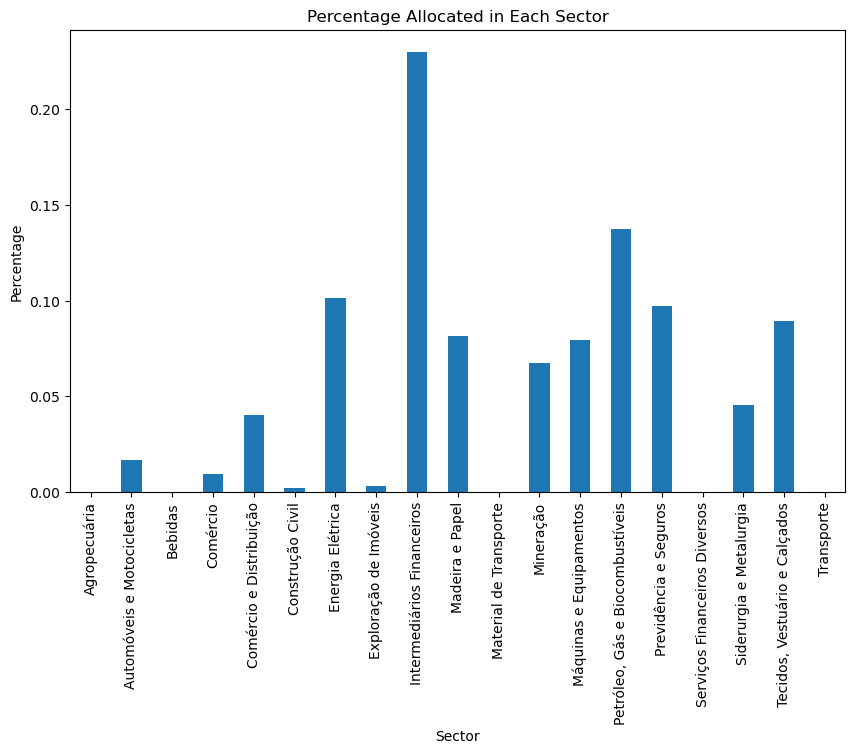

In [6]:


#create a chart using df dataframe to show the percentage alocated in each sector
import matplotlib.pyplot as plt
#print(df)

sector_data = df_grouped.groupby('SETOR')['PERCENTUAL'].sum()

plt.figure(figsize=(10, 6))
sector_data.plot(kind='bar')
plt.title('Percentage Allocated in Each Sector')
plt.xlabel('Sector')
plt.ylabel('Percentage')
plt.show()




# Call Gemini

In [ ]:

import google.generativeai as genai

# Configure your API key
# Get one at https://aistudio.google.com/
genai.configure(api_key=os.environ["API_KEY"])

def analyze_portfolio(file_path):
    # 1. Read the CSV file
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            csv_content = f.read()
    except FileNotFoundError:
        return "Error: File not found."

    # 2. Define the analysis prompt
    prompt = f"""
    You are an expert financial analyst AI tasked with creating a portfolio review.
    I am providing you with my stock portfolio data in CSV format. The 'PERCENTUAL' column represents the allocation percentage.

    Your task is to analyze this data and generate a comprehensive investment report in HTML format.

    **Crucially, you must prioritize your analysis on the stocks with the highest allocation percentages.**

    Here are the analysis criteria:

    1.  **High-Risk Stocks to Consider Selling:** Identify stocks with financial distress or overvaluation (Negative P/L, Negative EPS, High Debt, Negative Growth).
    2.  **Stocks to Buy/Keep for Dividends:** Identify attractive dividend payers (High Yield > 5%, Sustainable P/L).
    3.  **Stocks with High Growth Potential:** Identify undervalued stocks with strong fundamentals (Fair Value > Price, ROE > 15%, Positive Growth).

    **Output Requirements:**
    - Output MUST be a single block of HTML code (no <html>, <head> tags).
    - Use Tailwind CSS classes for styling.
    - Create three distinct sections: High-Risk, Dividends, Growth.
    - Each section must have a table with columns: "Ticker", "Sector", "Current Price", "Key Metric", "Justification", "Suggested Allocation".
    - In the "Ticker" column, hyperlink the symbol to MSNFundamentus: https://www.fundamentus.com.br/detalhes.php?papel=TICKER
    - Provide concrete "Suggested Allocation" advice.
    - Show current allocation percentages in the report.
    - HTML report should should use almost all space on a wide monitor, using nigh like format.
    - Show top 10 current alocations.

    Here is the CSV data:
    ---
    {csv_content}
    ---
    """

    # 3. Call the Gemini API
    print(f"Analyzing {file_path} with Gemini...")
    model = genai.GenerativeModel('gemini-2.5-flash')
    #model = genai.GenerativeModel('gemini-2.5-pro')
    
    
    try:
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        return f"Error analyzing portfolio: {str(e)}"

if __name__ == "__main__":
    # Replace with your CSV file path
    csv_file = "/home/ponche/projects/ibox/results/tikers_grouped.csv" 
    
    # Generate the report
    html_report = analyze_portfolio(csv_file)
    
    # Clean up markdown code blocks if present
    if html_report.startswith('```html'):
        html_report = html_report[7:-3].strip()
    elif html_report.startswith('```'):
        html_report = html_report[3:-3].strip()

    # Save to file
    output_file = '/home/ponche/projects/ibox/reports/report.html'
    with open(output_file, "w", encoding='utf-8') as f:
        # Wrap in a basic HTML structure for viewing
        full_html = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <title>Portfolio Analysis</title>
            <script src="https://cdn.tailwindcss.com"></script>
        </head>
        <body class="bg-gray-100 p-8">
            <div class="max-w-4xl mx-auto">
                {html_report}
            </div>
        </body>
        </html>
        """
        f.write(full_html)
    
    print(f"Analysis complete! Report saved to {output_file}")


Analyzing /home/ponche/projects/ibox/results/tikers_grouped.csv with Gemini...
Analysis complete! Report saved to /home/ponche/projects/ibox/reports/report.html
